# Data assimilation with 4DVar

In [1]:
# tutaj jakaś teoria, ładne wzorki itp

In [2]:
# nie dodawałem analizy wrażliwości, myślę że przed 4dvar dla obu modeli

### 4d var with Lorenz 63 model

![Lorenz equations](images/lorenz.png)

source: https://en.wikipedia.org/wiki/Lorenz_system

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D


In [4]:
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

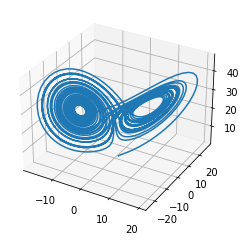

In [5]:
def f(state, _):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.draw()
plt.show()

[Dokumentacja](https://docs.salome-platform.org/latest/gui/ADAO/en/ref_algorithm_4DVAR.html)

In [6]:
from data_assimilation import assimilate

In [7]:
# fixme uzupełnic
xb = [1., 1., 1.]
error_vector = [10., 10., 10.]

### SEIR epidemic model

![SEIR epidemic model](images/seir.png)

S = S - S \* beta \* I / N  
E = E + S \ * beta \* I / N - eps \* E  
I = I + eps \* E - (alfa + gamma) \* I  
R = R + gamma \* I  
D = alfa \* I  

In [8]:
def evolution_function(state):
    """
    D = alfa * I
    S = S - S*beta*I/N
    E = E + S*beta*I/N - eps*E
    I = I + eps*E - (alfa+gamma)*I
    R = R + gamma*I
    """
    state = list(np.ravel(state))
    state = map(lambda x : max(x, 0), state)
    S_old, E_old, I_old, R_old, D_old, alfa, beta, eps, gamma = state

    N = S_old + E_old + I_old + R_old
    D = D_old + alfa * I_old
    S = S_old - S_old * beta * I_old / N
    E = E_old + S_old * beta * I_old / N - eps * E_old
    I = I_old + eps * E_old - (alfa + gamma) * I_old
    R = R_old + gamma * I_old

    results = [S, E, I, R, D, alfa, beta, eps, gamma]
    return np.array(results).reshape(-1, 1)

In [9]:
def observation_operator(state):
    D = state.reshape((-1, 9))[:, 4]
    return D

In [10]:
params = [8.96545184e-04, 5.43525126e-01, 8.58683367e-01, 4.33096921e-01]
seird = [100000, 100, 0, 0, 0]
state = np.array(seird + params).reshape(-1, 1)

In [11]:
from data_assimilation import prepare_obs
yobs = prepare_obs(state, observation_operator, evolution_function)

In [12]:
error_vector = [0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.5, 0.5, 0.5]
assimilate(seird + [0.01, 0.1, 0.1, 0.1], yobs, observation_operator, evolution_function, error_vector)

KeyboardInterrupt: 

### Assimilation of actual data

In [13]:
from data_assimilation import load_data
yobs = load_data(size = 100, country = 'POL')

In [14]:
assimilate(seird + [0.01, 0.1, 0.1, 0.1], yobs, observation_operator, evolution_function, error_vector, verbose=True)

  Intermediate CurrentState at the current iteration: [1.e+05 1.e+02 0.e+00 0.e+00 0.e+00 1.e-02 1.e-01 1.e-01 1.e-01]
  Intermediate CostFunctionJb at the current iteration: 0.0
  Intermediate CostFunctionJo at the current iteration: 109820694100.63574
  Intermediate CostFunctionJ at the current iteration: 109820694100.63574
  Intermediate IndexOfOptimum at the current iteration: 0
  Intermediate CurrentOptimum at the current iteration: [1.e+05 1.e+02 0.e+00 0.e+00 0.e+00 1.e-02 1.e-01 1.e-01 1.e-01]
  Intermediate CostFunctionJAtCurrentOptimum at the current iteration: 109820694100.63574
  Intermediate CostFunctionJbAtCurrentOptimum at the current iteration: 0.0
  Intermediate CostFunctionJoAtCurrentOptimum at the current iteration: 109820694100.63574
  Intermediate CurrentState at the current iteration: [ 1.00000000e+05  1.00000117e+02  1.32607430e-04 -1.71205459e-07
  4.38019552e-04  9.69458888e-01  2.71362230e-01  1.54877016e-01
 -1.16937592e-01]
  Intermediate CostFunctionJb at t

  Intermediate CurrentState at the current iteration: [ 1.00000000e+05  1.00003090e+02  3.15097953e-03 -1.77327965e-07
  2.63928068e-03  8.89634886e-01  6.89292812e-01  2.08200906e-01
 -1.24695533e-01]
  Intermediate CostFunctionJb at the current iteration: 2.343987591524869
  Intermediate CostFunctionJo at the current iteration: 105478277098.47438
  Intermediate CostFunctionJ at the current iteration: 105478277100.81837
  Intermediate IndexOfOptimum at the current iteration: 9
  Intermediate CurrentOptimum at the current iteration: [ 1.00000000e+05  1.00003090e+02  3.15097953e-03 -1.77327965e-07
  2.63928068e-03  8.89634886e-01  6.89292812e-01  2.08200906e-01
 -1.24695533e-01]
  Intermediate CostFunctionJAtCurrentOptimum at the current iteration: 105478277100.81837
  Intermediate CostFunctionJbAtCurrentOptimum at the current iteration: 2.343987591524869
  Intermediate CostFunctionJoAtCurrentOptimum at the current iteration: 105478277098.47438
  Intermediate CurrentState at the current

KeyboardInterrupt: 